## About

This page showcases the work of [Tuo Wang](https://tuowang.rbind.io/) that introduces packages to make [`ggplot2`](https://ggplot2.tidyverse.org/) plots more beautiful. You can find the original [R](https://www.r-graph-gallery.com/) code on Tuo's blog [here](https://tuowang.rbind.io). 

Thanks to him for accepting sharing his work here! Thanks also to [Tomás Capretto](https://tomicapretto.github.io/) who translated this work from R to Python! 🙏🙏

As a teaser, here is the plot we’re gonna try building:

![preview final chart](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-text-repel-with-matplotlib-square.png?raw=true)

## Load libraries

Today's visualization is made with matplotlib and the library [`adjustText`](https://github.com/Phlya/adjustText) to automatically adjust the position of labels in the plot. In addition, `load_penguins()` is imported from the palmerpenguins library to have access to the popular palmerpenguins dataset, and the `Faker` class is imported from the [`faker`](https://faker.readthedocs.io/) library to generate random names.

>Note: the `adjustText` library can be installed with `pip install adjustText`

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from adjustText import adjust_text
from faker import Faker
from palmerpenguins import load_penguins

## Load and prepare data

The dataset used today was collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/). This dataset was popularized by [Allison Horst](https://www.allisonhorst.com/) in her R package [`palmerpenguins`](https://allisonhorst.github.io/palmerpenguins/) with the goal to offer an alternative to the iris dataset for data exploration and visualization.

In [2]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Today's vizualisation does not require much data preparation. The only preparation step is to drop observations with missing values.

In [3]:
penguins = penguins.dropna()

## Basic Scatterplot

Let's start by defining some important values that are used throughout the plot.

In [4]:
# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
GREY30 = "#4d4d4d"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
COLORS = ["#386cb0", "#fdb462", "#7fc97f" ] # A color for each species

# A list with the species names
SPECIES = sorted(penguins["species"].unique())

# Horizontal lines
HLINES = [40, 50, 60]

# Vertical and horizontal tick marks
YTICKS = [40, 50, 60]
XTICKS = [160, 170, 180, 190, 200, 210, 220, 230, 240]

# List of random names
# Generate Faker instance and set seed or reproducibility
faker = Faker()
# Set seed for reproducibility of the random names
faker.seed_instance(11) 
NAMES = [faker.first_name() for i in range(len(penguins))]

# The markers we use in the scatterplot
MARKERS = ["o", "^", "s"] # circle, triangle, square

Then, let's initialize the chart layout, add a background color and the basic scatterplot:

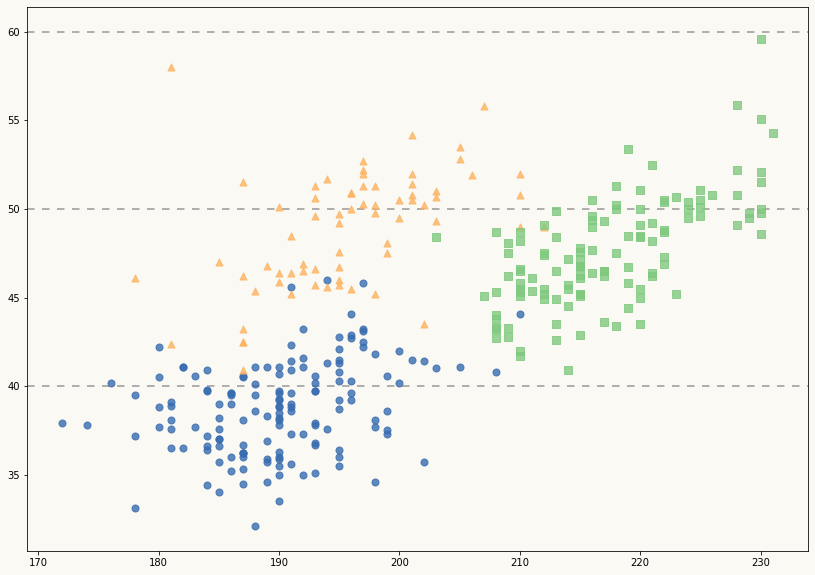

In [5]:
# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize= (14, 10))

# Background color
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

# Horizontal lines in the background
for h in HLINES:
    ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add scatterplot  -----------------------------------------------
# Loop through species, colors, and markers.
# Each species receives a different combination of color and marker.
for species, color, marker  in zip(SPECIES, COLORS, MARKERS):
    data = penguins[penguins["species"] == species]
    ax.scatter(
        "flipper_length_mm", "bill_length_mm", s=50, color=color, 
        marker=marker, alpha=0.8, data=data
    )

That's a pretty good start, but let's make it better!

## Add labels with no overlap

What's truely missing here are __labels__. It's very frustrating not knowing which item is hidden under a data point, isn't it!?

It is pretty challenging to add many labels on a plot since labels tend to overlap each other, making the figure unreadable. Fortunately, the `adjustText` package is here to help us. It provides an algorithm that will automatically place the labels for us. Let's do it!

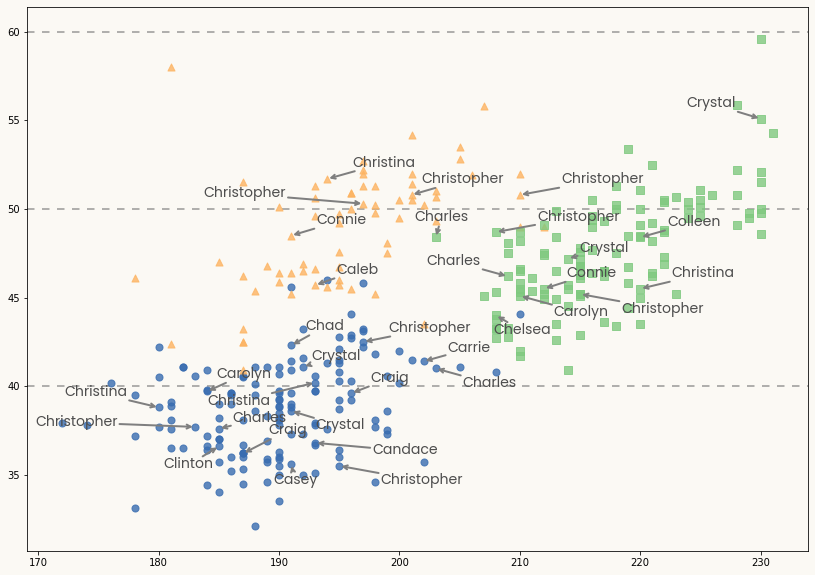

<Figure size 432x288 with 0 Axes>

In [6]:
# Add name labels ------------------------------------------------
# Only names that start with the letter "C" are added.
# `ax.text()` outputs are appended to the `TEXTS` list. 
# This list is passed to `adjust_text()` to repel the labels and add arrows.
TEXTS = []
for i in range(len(penguins)):
    if NAMES[i].startswith("C"):
        x = penguins["flipper_length_mm"].iloc[i]
        y = penguins["bill_length_mm"].iloc[i]
        text = NAMES[i]
        TEXTS.append(ax.text(x, y, text, color=GREY30, fontsize=14, fontname="Poppins"))


# Adjust text position and add arrows ----------------------------
# 'expand_points' is a tuple with two multipliers by which to expand
# the bounding box of texts when repelling them from points

# 'arrowprops' receives a dictionary with all the properties we want
# for the arrows
adjust_text(
    TEXTS, 
    expand_points=(2, 2),
    arrowprops=dict(
        arrowstyle="->", 
        color=GREY50, 
        lw=2
    ),
    ax=fig.axes[0]
)
fig

Note the `ax=fig.axes[0]` in the `adjust_text()` function call. That is not always necessary. In this case, the plot is built in several steps for demonstration purposes and so the axis object must be passed explicitly. When `ax` isn't explicitly passed, `adjust_text()` will use `plt.gca()` to obtain the axis. If all the code used to generate your plot goes in the same chunk of code than `adjust_text)`, then there's no need to pass any axis.

## Final chart

The chart above is pretty close from being publication ready. What's needed now is a good title, a legend to make color and shapes more insightful, and some axis customization:

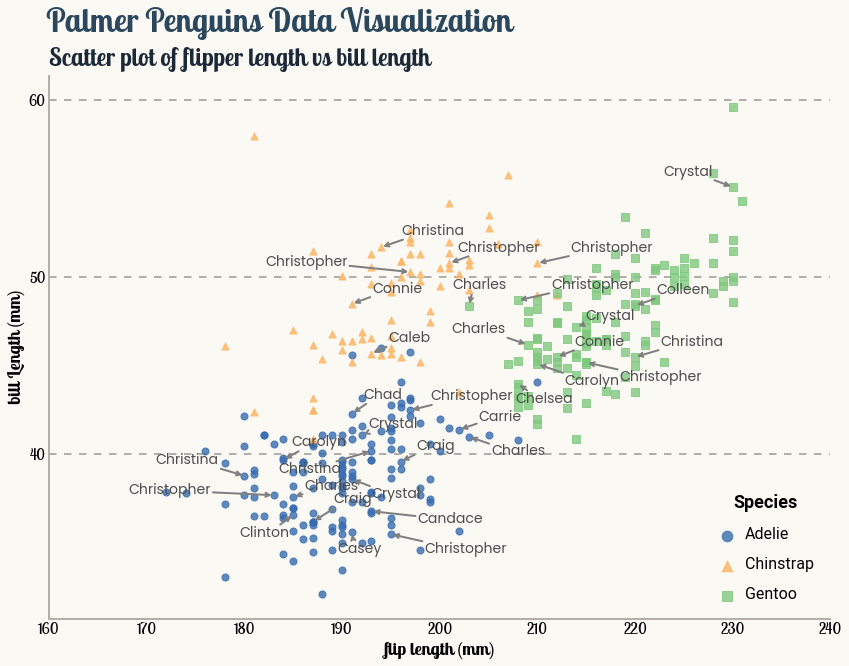

In [7]:
# Add title and subtitle -----------------------------------------
# Title
fig.suptitle(
    "Palmer Penguins Data Visualization",
    x = 0.122,
    y = 0.975,
    ha="left",
    fontsize=32,
    fontname="Lobster Two",
    color=BLUE,
    weight="bold",    
)

# Subtitle
ax.set_title(
    "Scatter plot of flipper length vs bill length",
    loc="left",
    ha="left",
    fontsize=24,
    fontname="Lobster Two",
    color=BLUE_DARK,
    weight="bold",
    pad=10
)

# Add legend -----------------------------------------------------

# We store the result of `ax.legend()` for further customizations
legend = ax.legend(
    loc=(0.85, 0.025), # bottom-right
    labelspacing=1.5,  # add space between labels
    markerscale=1.5,   # increase marker size
    frameon=False      # don't put a frame
)

# Iterate through text elements and species names
for text, species in zip(legend.get_texts(), SPECIES):
    text.set_text(species)       # Set species name
    text.set_fontname("Roboto")  # Change default font 
    text.set_fontsize(16)        # Change default font size

# Grab title and customize its appearence.
legend.set_title("Species")
legend_title = legend.get_title()
legend_title.set_fontname("Roboto")
legend_title.set_fontweight("bold")
legend_title.set_fontsize(18)
legend_title.set_ha("left")

# Customize layout -----------------------------------------------
# Hide spines
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

# Customize spines color
ax.spines["left"].set_color(GREY_LIGHT)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_color(GREY_LIGHT)
ax.spines["bottom"].set_linewidth(2)

# Customize labels and ticks
ax.tick_params(length=0)

ax.set_yticks(YTICKS)
ax.set_yticklabels(YTICKS, fontname="Lobster Two", size=15)
ax.set_ylabel("bill Length (mm)", fontname="Lobster Two", size=18, weight="bold")

ax.set_xticks(XTICKS)
ax.set_xticklabels(XTICKS, fontname="Lobster Two", size=15)
ax.set_xlabel("flip length (mm)", fontname="Lobster Two", size=18, weight="bold")

fig